In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('EMPdataset.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
data = df.drop(['DailyRate', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'MonthlyRate','Over18', 'RelationshipSatisfaction', 'StandardHours'],axis=1)

In [8]:
data.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [9]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,2,Female,3,2,...,11,3,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,3,Male,2,2,...,23,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,4,Male,2,1,...,15,3,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,4,Female,3,1,...,11,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,1,Male,3,1,...,12,3,1,6,3,3,2,2,2,2


In [10]:
data.shape

(1470, 26)

In [11]:
categorical_column = ['Attrition', 'BusinessTravel', 'Department',
                      'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

In [12]:
data_encoded = data.copy(deep=True)

In [13]:
lab_enc = preprocessing.LabelEncoder()
for col in categorical_column:
        data_encoded[col] = lab_enc.fit_transform(data[col])
        le_name_mapping = dict(zip(lab_enc.classes_, lab_enc.transform(lab_enc.classes_)))
        print('Feature', col)
        print('mapping', le_name_mapping)

Feature Attrition
mapping {'No': 0, 'Yes': 1}
Feature BusinessTravel
mapping {'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}
Feature Department
mapping {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}
Feature Gender
mapping {'Female': 0, 'Male': 1}
Feature JobRole
mapping {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}
Feature MaritalStatus
mapping {'Divorced': 0, 'Married': 1, 'Single': 2}
Feature OverTime
mapping {'No': 0, 'Yes': 1}


In [14]:
data_encoded.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,1,2,2,0,3,2,...,11,3,0,8,0,1,6,4,0,5
1,49,0,1,1,8,1,3,1,2,2,...,23,4,1,10,3,3,10,7,1,7
2,37,1,2,1,2,2,4,1,2,1,...,15,3,0,7,3,3,0,0,0,0
3,33,0,1,1,3,4,4,0,3,1,...,11,3,0,8,3,3,8,7,3,0
4,27,0,2,1,2,1,1,1,3,1,...,12,3,1,6,3,3,2,2,2,2


In [15]:
data_encoded.shape

(1470, 26)

In [16]:
data_encoded['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

(array([  0.,  17., 309., 622., 349., 168.,   5.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70]),
 <BarContainer object of 7 artists>)

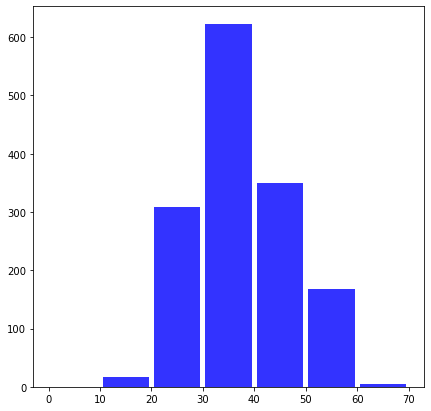

In [17]:
#Plot to see distribution of age overall
plt.rcParams["figure.figsize"] = [7,7]
plt.hist(data_encoded['Age'], bins=np.arange(0,80,10), alpha=0.8, rwidth=0.9, color='blue')

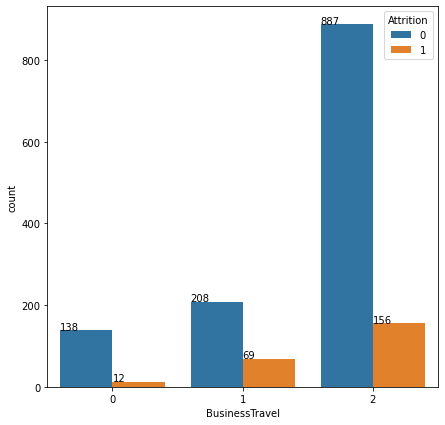

In [18]:
ax = sns.countplot(x="BusinessTravel", hue="Attrition", data=data_encoded)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

In [19]:
positive_attrition_df = data_encoded.loc[data_encoded['Attrition'] == 1]
negative_attrition_df = data_encoded.loc[data_encoded['Attrition'] == 0]

(array([807., 246., 180.,   0.,   0.,   0.,   0.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70]),
 <BarContainer object of 7 artists>)

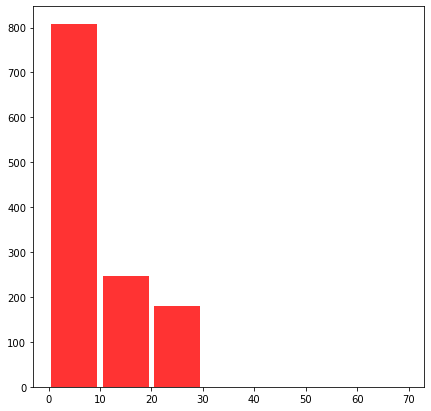

In [20]:
plt.hist(negative_attrition_df['DistanceFromHome'], bins=np.arange(0,80,10), alpha=0.8, rwidth=0.9, color='red')

In [21]:
df_age = data_encoded.copy(deep=True)
df_age.loc[df_age['Age'] <= 20, 'Age'] = 0
df_age.loc[(df_age['Age'] > 20) & (df_age['Age'] <= 30), 'Age'] = 1
df_age.loc[(df_age['Age'] > 30) & (df_age['Age'] <= 40), 'Age'] = 2
df_age.loc[(df_age['Age'] > 40) & (df_age['Age'] <= 50), 'Age'] = 3
df_age.loc[(df_age['Age'] > 50), 'Age'] = 4

In [22]:
df_age = pd.DataFrame({'count': df_age.groupby(["Gender", "Attrition"]).size()}).reset_index()
df_age['Gender-attrition'] = df_age['Gender'].astype(str) + "-" + df_age['Attrition'].astype(str).map(str)

In [23]:
df_age

,Gender,Attrition,count,Gender-attrition
0,0,0,501,0-0
1,0,1,87,0-1
2,1,0,732,1-0
3,1,1,150,1-1


Here,

* Gender - 0 and Attrition - 0 ===> Female employees who will stay
* Gender - 0 and Attrition - 1 ===> Female employees who will leave
* Gender - 1 and Attrition - 0 ===> Male employees who will stay
* Gender - 1 and Attrition - 1 ===> Male employees who will leave

<AxesSubplot:xlabel='Attrition', ylabel='count'>

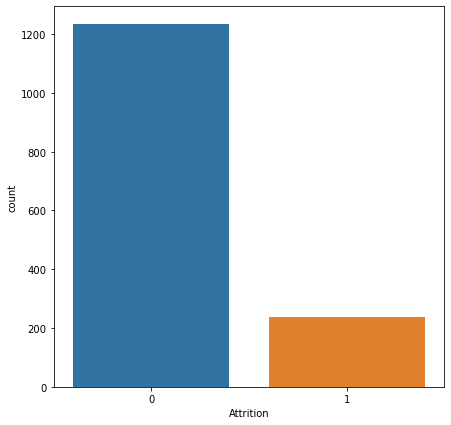

In [24]:
sns.countplot(x='Attrition',data=data_encoded)

In [25]:
# Shuffle the Dataset.
shuffled_df = data_encoded.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
pos = shuffled_df.loc[shuffled_df['Attrition'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
neg = shuffled_df.loc[shuffled_df['Attrition'] == 0].sample(n=500,random_state=42)

In [26]:
df=pd.concat([pos,neg])
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1153,18,1,1,2,3,2,2,0,3,1,...,12,3,0,0,2,4,0,0,0,0
608,55,1,2,2,2,1,3,1,3,2,...,16,3,0,12,3,2,9,7,7,3
293,26,1,2,2,4,4,4,1,2,2,...,12,3,0,8,0,3,8,7,7,4
1452,50,1,1,2,1,4,2,1,3,2,...,12,3,2,12,3,3,6,3,0,1
656,32,1,2,1,25,4,1,1,3,1,...,24,4,0,1,2,1,1,0,0,1


In [27]:
df.shape

(737, 26)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

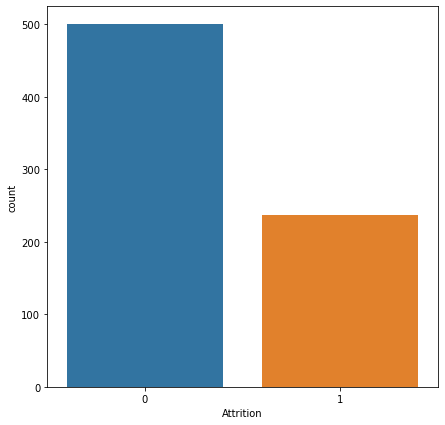

In [28]:
sns.countplot(x='Attrition',data=df)

In [29]:
df.to_csv('final.csv')

In [30]:
X=df.iloc[:,df.columns !='Attrition'].values
Y=df.iloc[:,df.columns =="Attrition"].values

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=0)

In [32]:
X.shape

(737, 25)

In [33]:
X_train.shape

(589, 25)

In [34]:
X_test.shape

(148, 25)

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
random_forest = RandomForestClassifier(n_estimators=100)

In [37]:
random_forest.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
y_pred = random_forest.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix 

In [40]:
rfacc=metrics.accuracy_score(y_test,y_pred)
rfacc

0.7635135135135135

In [41]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[97,  8],
       [27, 16]], dtype=int64)

<AxesSubplot:>

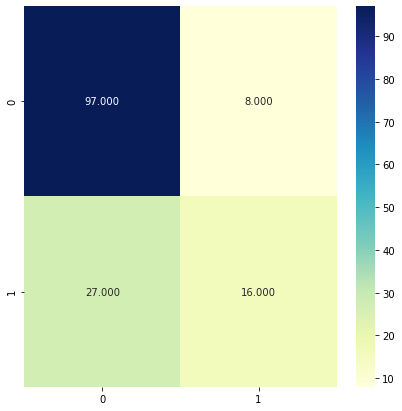

In [42]:
label=[0,1]
sns.heatmap(cnf_matrix,annot=True,cmap='YlGnBu',fmt='.3f',xticklabels=label,yticklabels=label)

In [43]:
from sklearn.svm import SVC

In [44]:
model2=SVC()

In [45]:
model2.fit(X_train,y_train)

SVC()

In [46]:
Predict2=model2.predict(X_test)

In [47]:
sv=metrics.accuracy_score(y_test,Predict2)
sv

0.7094594594594594

<AxesSubplot:>

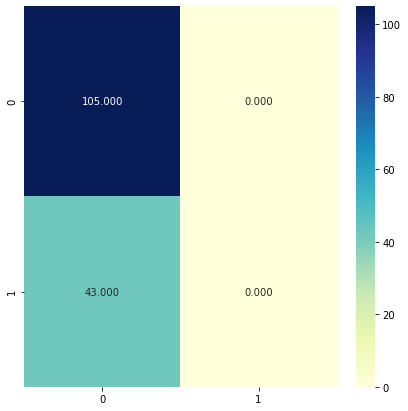

In [48]:
cnf_matrix = confusion_matrix(y_test,Predict2)
label=[0,1]
sns.heatmap(cnf_matrix,annot=True,cmap='YlGnBu',fmt='.3f',xticklabels=label,yticklabels=label)

In [49]:
inputs=[[49,1,1,2,1,2,1,3,5,5,4,1,19161,3,0,15,3,0,28,3,3,5,4,4,3]]

In [50]:
y_pred = random_forest.predict(inputs)
y_pred.astype("int")

array([0])

In [51]:
if (y_pred == 0):
    print("Retention")
else:
    print("Attrition")

Retention
